### The BeachNourisher Module

In this notebook we test and show the functionality of the BeachNourisher module within `CASCADE`.

In [1]:
import numpy as np
import sys
import time
from pathlib import Path

sys.path.extend(['/Users/KatherineAnardeWheels/PycharmProjects/Barrier3D', '/Users/KatherineAnardeWheels/PycharmProjects/brie', '/Users/KatherineAnardeWheels/PycharmProjects/CASCADE'])
# datadir = "./B3D_Inputs/"  # laptop 
# Path(datadir)
datadir = "/Users/KatherineAnardeWheels/PycharmProjects/CASCADE/B3D_Inputs/"  # laptop

from CASCADE import Cascade
from scripts import CASCADE_plotters as CASCADE_Plt

ModuleNotFoundError: No module named 'economics'

In [2]:
# start a model by nourishing one B3D domain at discrete intervals, here we chose every 15 years; 
# no roadway mgmt; increase sea level rise to 0.005 m/yr
nt = 50
cascade = Cascade(
    datadir,
    name="nourishment_intervals",
    alongshore_section_count=1,
    time_step_count=nt,
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=True,
    artificial_max_dune_ele=3.7,  # dune rebuilt to this height every nourishment
    nourishment_interval=15,  # yrs
    nourishment_volume=100,  # m^3/m -- should produce about 20 m of shoreline progradation
)

# --------- LOOP ---------
Time = time.time()

for time_step in range(nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade.update()
    if cascade.road_break or cascade.b3d_break:
        break

 Time Step:  48

TypeError: 'numpy.int64' object is not iterable

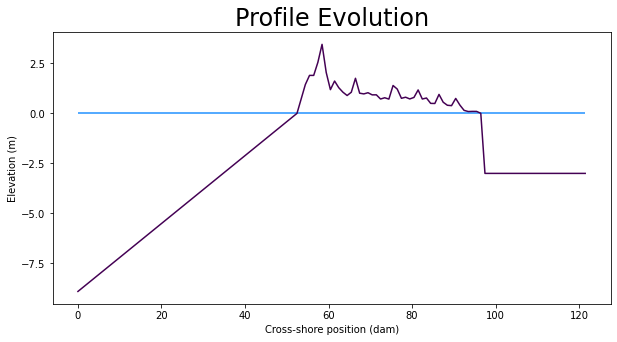

In [3]:
time_step = np.arange(0,21,10)
fig = CASCADE_Plt.plot_ModelTransects(cascade, time_step, iB3D=0)
fig.set_xlim([40,60])